# CS431 - CÁC KỸ THUẬT HỌC SÂU VÀ ỨNG DỤNG

**Hướng dẫn**:
- Khởi động kernel: Ở thanh menu, chọn Kernel$\rightarrow$Restart kernel.
- Hoàn tất tất cả các mục có comment `YOUR CODE HERE`
- Chạy toàn bộ các block code để kiểm tra: Ở thanh menu, chọn Cell$\rightarrow$Run All.

---

# CÀI ĐẶT MÔ HÌNH NEURAL NETWORK VỚI KERAS

Một mô hình máy học cần có đủ ít nhất 7 phương thức sau:
- `__init__`: hàm constructor trong hướng đối tượng, được sử dụng để khởi tạo các tham số mặc định hoặc tham số bắt đầu một mô hình. Trong những bài tập đầu tiên, để đơn giản constructor sẽ không sử dụng.
- `build`: xây dựng kiến trúc của mô hình
- `train`: bắt đầu quá trình huấn luyện mô hình
- `save`: lưu lại mô hình sau khi đã huấn luyện
- `load`: load lên mô hình từ file đã huấn luyện (pretrained)
- `summary`: in tóm tắt kiến trúc mô hình
- `predict`: dự đoán giá trị output từ dữ liệu đầu vào

In [1]:
# Mô hình cài đặt tổng quát bao gồm 7 phương thức cơ bản
# Lưu ý: mô hình này chỉ mang tính gợi ý, không bắt buộc
# Tuy nhiên, trong phần bài tập cần tuân theo các tên phương thức này
class MyModel:
    # constructor
    def __init__(self):
        return None

    # Implement architecture of the model
    def build(self):
        return None

    # Train the defined model with training and validation data
    def train(self):
        return None

    # Save the trained model to file
    def save(self, model_path):
        return None

    # Load pretrained model from file
    def load(self):
        return None
    # Visualize your model
    def summary(self):
        return None

    # Apply your model with new input data
    def predict(self):
        return None

## 1. Import các thư viện Keras

Đầu tiên, ta sẽ import các thư viện, module, hàm của `Keras`:
- `Input`: để nhận dữ liệu đầu vào cho mô hình
- `Dense`: hay còn gọi là lớp Fully Connected (Lớp kết nối đầy đủ), một thành phần quan trọng của các mô hình dựa trên mạng Neural Network.
- `Model`: đây là lớp đối tượng mô hình được sử dụng để đóng gói lớp đầu vào, đầu ra, sau đó huấn luyện với phương thức `fit` và dự đoán kết quả với `predict`.
- `load_model`: hàm sử dụng để load mô hình lên từ file

In [2]:
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model
import numpy as np

## 2. Cài đặt mô hình Neural Network
Tiếp theo, ta sẽ dựa trên khung đối tượng `MyModel` đã trình bày ở mục trước để tiến hành cài đặt mô hình **Neural Network**. Phương thức chính mà bài tập này cần thực hiện là `def build()`. Các phương thức còn lại đã được cài đặt sẵn, các bạn cần đọc, hiểu ý nghĩa và cách thức sử dụng về sau.


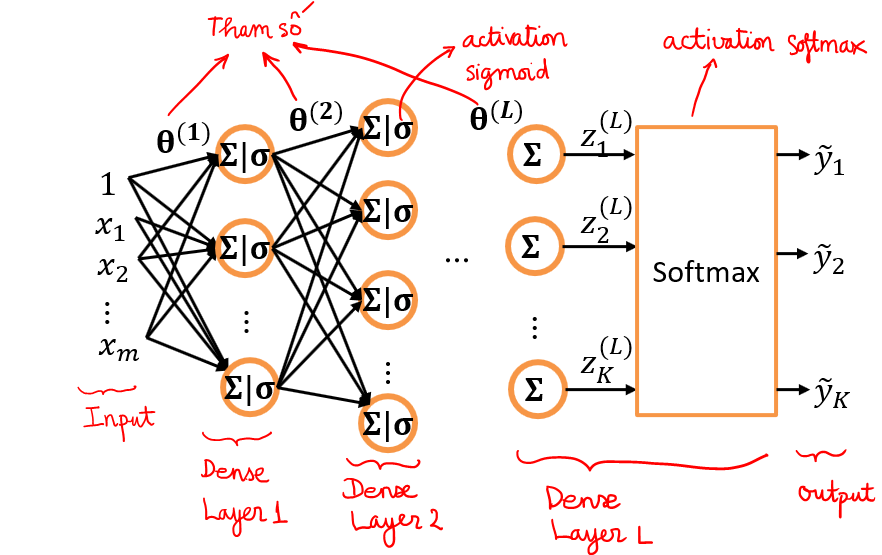

In [3]:
# Neural Network
class NeuralNetwork:
    def __init__(self): # Self is similar to your 'this' pointer in C++
        return None

    def build(self, input_dim, output_dim, n_hidden, n_neurons):
        # `input_dim`: kích thước input feature
        # `output_dim`: số phân lớp cần phân loại
        # `n_hidden`: số lượng lớp ẩn
        # `n_neurons`: số lượng neuron mỗi lớp ẩn

        # Khởi tạo model
        self.model = None

        # Hãy cài đặt để định nghĩa KIẾN TRÚC MÔ HÌNH và lưu ở thuộc tính `self.model`
        # với các biến đối tượng sau:
        #  - tạo biến `input` với lớp đối tượng `Input` của Keras,
        #    truyền vào kích thước đầu vào `input_dim`
        #  - tạo `n_hidden`lớp ẩn biết rằng, mỗi lớp ẩn có `n_neurons`, có sử dụng bias
        #    activation là hàm `sigmoid`. Đầu ra của lớp ẩn này là đầu vào lớp ẩn sau.
        #  - tạo biến `output` với lớp đối tượng `Dense` của Keras,
        #    truyền vào các tham số:  kích thước output (chú ý PHÂN LOẠI ĐA LỚP),
        #    có sử dụng bias, CÓ SỬ DỤNG hàm activation là `softmax`. Đầu vào của lớp
        #    output chính là lớp ẩn cuối cùng.
        # Sau bước này, self.model sẽ đóng gói 2 biến `input` và `output` để tạo thành mô hình

        # YOUR CODE HERE
        #raise NotImplementedError()

        inputs = Input(shape=(input_dim,))

        # Initialize the output of the first hidden layer to be the input
        x = inputs

        # Define the hidden layers
        for _ in range(n_hidden):
            x = Dense(n_neurons, activation='sigmoid', use_bias=True)(x)

        # Define the output layer
        output = Dense(output_dim, activation='softmax', use_bias=True)(x)

        # Define the model using the input and output layers
        self.model = Model(inputs=inputs, outputs=output)

        return self.model

    def train(self, x_train, y_train, epochs=500):
        # Khởi tạo mặc định với số `epochs=50`, `learning_rate=0.05`
        opt = tf.keras.optimizers.SGD(learning_rate=0.05) # Stochastic Gradient Descent
        self.model.compile(optimizer=opt, loss='categorical_crossentropy') # CCE loss
        return self.model.fit(x_train, y_train, epochs=epochs)

    def save(self, model_file):
        return self.model.save(model_file)

    def load(self, model_file):
        self.model = load_model(model_file)

    def summary(self):
        self.model.summary()

    def predict(self, x_test):
        return self.model.predict(x_test)

    def get_weights(self, layer_id):
        return self.model.layers[layer_id].get_weights()

Tiếp theo, ta sẽ khởi tạo đối tượng NeuralNetwork và kiểm tra thử xem phương `build` đã cài đặt chính xác chưa.

In [4]:
nn = NeuralNetwork()
# Trong ví dụ này, ta sẽ khởi tạo input là một vector 1000 chiều,
# bài toán cần phân loại 20 lớp đối tượng. Số lượng lớp ẩn là 3
# và số neuron mỗi lớp ẩn là  10.
nn.build(1000, 20, 3, 10)
nn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 10)                10010     
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 20)                220       
                                                                 
Total params: 10450 (40.82 KB)
Trainable params: 10450 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Kiểm tra sơ bộ kiến trúc mạng gồm 2 + 3 = 5 lớp: Input, 3 lớp ẩn và Output
assert len(nn.model.layers)==5
assert str(type(nn.model.layers[0])).endswith("input_layer.InputLayer'>") == True
assert str(type(nn.model.layers[1])).endswith("core.dense.Dense'>") == True
assert str(type(nn.model.layers[2])).endswith("core.dense.Dense'>") == True
assert str(type(nn.model.layers[3])).endswith("core.dense.Dense'>") == True
assert str(type(nn.model.layers[4])).endswith("core.dense.Dense'>") == True
assert nn.model.layers[0].input_shape[0][1] == 1000
assert nn.model.layers[-1].output_shape[1] == 20
assert nn.model.layers[1].use_bias == True

In [6]:
# Kiểm tra với bộ test ẩn

## 3. Tạo dữ liệu mẫu (toy example)
Bước tiếp theo, ta sẽ tiến hành tạo mẫu dữ liệu để huấn luyện và kiểm thử.

Dữ liệu được tạo ra là các điểm rải ngẫu nhiên xung quanh 4 cụm điểm:
- [10, -2]
- [2, 8]
- [12, 8]
- [-2, 0]

Lưu ý rằng, 4 cụm điểm này rời nhau đủ xa để khi thêm nhiễu ngẫu nhiên,
các điểm thuộc 4 cụm này vẫn không giao thoa nhau.

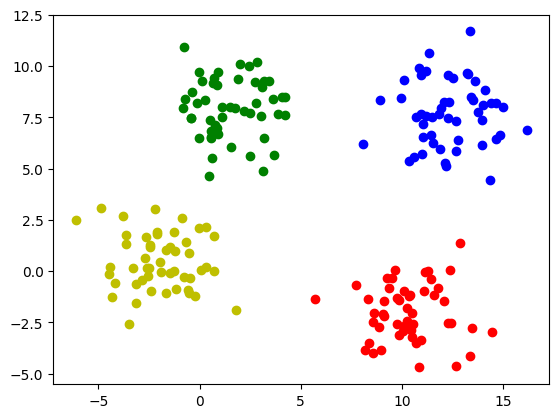

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Số phân lớp: 4
K = 4
# Tạo bộ dữ  liệu gồm 4 điểm
# S1, S2, S3, S4 là tâm của 4 lớp
S1= np.array([[10,-2]])
S2= np.array([[2,8]])
S3= np.array([[12,8]])
S4= np.array([[-2,0]])

# 50 samples mỗi lớp
n_sample = 50
# Phát sinh các điểm với nhiễu ngẫu nhiên xung quanh 4 tâm
pts1 = S1 + np.random.normal(0, 1.5, size=(n_sample,2))
pts2 = S2 + np.random.normal(0, 1.5, size=(n_sample,2))
pts3 = S3 + np.random.normal(0, 1.5, size=(n_sample,2))
pts4 = S4 + np.random.normal(0, 1.5, size=(n_sample,2))

# Nối tất cả các mẫu thành một khối dữ liệu X (input feature) và Y (nhãn)
X_train = np.concatenate((pts1, pts2, pts3, pts4))
# Concatenate data labels to a single input variable Y
Y_train = np.concatenate(([0]*n_sample, [1]*n_sample, [2]*n_sample, [3]*n_sample))

# Chuyển Y từ dạng nhãn sang one-hot vector
Y_train = Y_train.astype(int)
Y_oh = np.zeros((Y_train.size, Y_train.max()+1 ))
Y_oh[np.arange(Y_train.size), Y_train] = 1

# Trực quan hóa dữ liệu bằng các hình tròn màu đỏ, xanh lá, xanh dương và vàng
plt.plot(pts1[:,0], pts1[:,1], 'ro')
plt.plot(pts2[:,0], pts2[:,1], 'go')
plt.plot(pts3[:,0], pts3[:,1], 'bo')
plt.plot(pts4[:,0], pts4[:,1], 'yo')
plt.show()


## 4. Huấn luyện mô hình với dữ liệu mẫu

Tiếp theo, ta sẽ khởi tạo lại mô hình để phù hợp với dữ liệu mẫu đã phát sinh ở bước trước. Việc xây dựng kiến trúc của mô hình phải phù hợp với số chiều của dữ liệu mẫu.

In [8]:
nn = NeuralNetwork()

# Hãy gọi phương thức `build` cho đối tượng `sr` và truyền tham số đầu vào
# tương ứng với dữ liệu train đã phát sinh ở code block trên
# Theo bạn, `input_dim`, `output_dim` bằng bao nhiêu?
# Đối với các lớp ẩn, ta khởi tạo 01 lớp ẩn và 03 neuron cho mỗi lớp ẩn

# YOUR CODE HERE
nn.build(2,4,1,3)
#raise NotImplementedError()



# Để hiển thị kiến trúc của mô hình ta gọi phương thức `summary`
print("Kiến trúc của mô hình Neural Network: ")
nn.summary()

Kiến trúc của mô hình Neural Network: 
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 4)                 16        
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Kiểm tra kết quả khi đối tượng `nn` gọi phương thức `build`
assert len(nn.model.layers)==3
assert str(type(nn.model.layers[0])).endswith("input_layer.InputLayer'>") == True
assert str(type(nn.model.layers[1])).endswith("core.dense.Dense'>") == True
assert str(type(nn.model.layers[2])).endswith("core.dense.Dense'>") == True

# Check shapes
assert nn.model.layers[0].input_shape[0][1] == 2
assert nn.model.layers[1].output_shape[1] == 3
assert nn.model.layers[2].output_shape[1] == 4

# Check activation
assert abs(nn.model.layers[1].activation(1.0).numpy() - 0.7310586)<0.00000001
assert abs(nn.model.layers[1].activation(-1.0).numpy() - 0.26894143)<0.00000001
inputs = tf.random.normal(shape=(32, 10))
assert np.mean(abs(nn.model.layers[2].activation(inputs).numpy() -
                   tf.keras.activations.softmax(inputs).numpy()))<0.00001

# Check bias
assert nn.model.layers[1].use_bias == True
assert nn.model.layers[2].use_bias == True

In [10]:
# Để huấn luyện mô hình ta gọi phương thức `train` với dữ liệu mẫu đã tạo được
# Nếu bước `build` mô hình gọi đúng thì bước `train` sau sẽ thực hiện thành công
# LƯU Ý: Ở đây ta sử dụng output là Y_oh dạng one-hot thay vì dạng nhãn (label)
hist = nn.train(X_train, Y_oh)

Epoch 1/500
7/7 [==============================] - 1s 3ms/step - loss: 1.5157
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 1.4521
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 1.3952
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 1.3430
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 1.2950
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 1.2542
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 1.2222
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 1.1916
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 1.1632
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 1.1382
Epoch 11/500
7/7 [==============================] - 0s 3ms/step - loss: 1.1131
Epoch 12/500
7/7 [==============================] - 0s 2ms/step - loss: 1.0902
Epoch 13/500
7/7 [==============================] - 0s 2ms/st

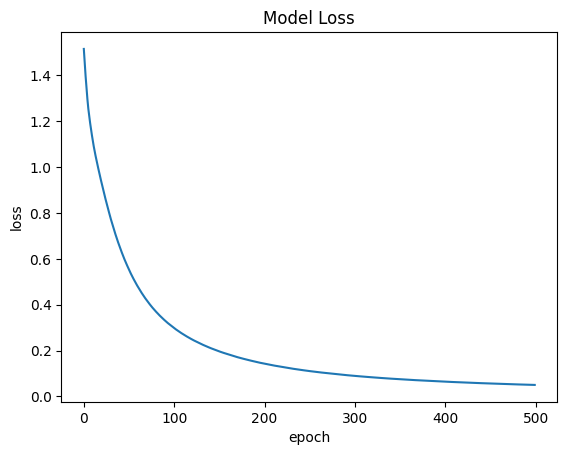

In [11]:
# Hiển thị loss theo số epoch
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [12]:
# Sau khi đã huấn luyện, ta lưu mô hình về để sau này tái sử dụng
# Lưu ý: hai phương thức lưu mô hình `save` và tải mô hình lên 'load'
# được sử dụng khi muốn tái sử dụng nhiều lần mà KHÔNG CẦN PHẢI HUẤN LUYỆN LẠI
nn.save('neural_network_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 5. Trực quan hóa mô hình và dự đoán với dữ liệu test

In [13]:
# Khởi tạo đối tượng mới và gọi phương thức load mô hình từ file
pretrain_nn = NeuralNetwork()
pretrain_nn.load('neural_network_model.h5')

In [14]:
# In ra bộ tham số tối ưu lớp cuối cùng
theta = pretrain_nn.get_weights(-1)
print('Tham số tối ưu: ')
print(theta)

Tham số tối ưu: 
[array([[-1.6801491 ,  4.323899  , -3.4005332 ,  1.92476   ],
       [-1.5369858 , -2.8511548 , -0.9206213 ,  4.6452527 ],
       [-3.8126168 ,  0.86500007,  3.618057  , -0.71101344]],
      dtype=float32), array([ 3.1416237 , -1.4542661 , -0.42528096, -1.2620754 ], dtype=float32)]


20/20 [==============================] - 0s 2ms/step


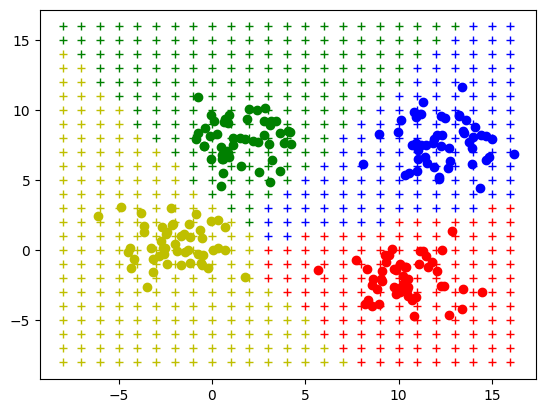

In [15]:
# Trực quan hóa dữ liệu và mô hình sau khi huấn luyện
# Ý tưởng: lấy mẫu dày đặc các điểm trong phạm vi dữ liệu train
# Sau đó dùng mô hình để dự đoán và hiển thị kết quả

# `colors` là các marker được sử dụng để trực quan hóa kết quả test
colors = ['r+', 'g+', 'b+', 'y+']
# `gt_colors` là các marker được sử dụng để trực quan hóa dữ liệu train
gt_colors = ['ro', 'go', 'bo', 'yo']

# Lấy mẫu dày đặc các điểm
x = np.arange(-8, 17, 1)
y = np.arange(-8, 17, 1)
xx, yy = np.meshgrid(x,y)

xx = xx.reshape(-1)
yy = yy.reshape(-1)

# Tạo các dữ liệu test dày đặc
X_test = np.concatenate([[xx],[yy]], axis=0).T
Y_pred = pretrain_nn.predict(X_test)

for i in range(len(xx)):
    plt.plot(xx[i],yy[i], colors[np.argmax(Y_pred[i])])
plt.plot(pts1[:,0], pts1[:,1], gt_colors[0])
plt.plot(pts2[:,0], pts2[:,1], gt_colors[1])
plt.plot(pts3[:,0], pts3[:,1], gt_colors[2])
plt.plot(pts4[:,0], pts4[:,1], gt_colors[3])
plt.show()

Ta có thể thấy rằng, không gian mặt phẳng đã được phân loại sử dụng mô hình Neural Network đã huấn luyện trước đó. Dựa trên hình trên ta thấy kết quả khá chính xác, chỉ trừ một số điểm ở biên giữa các lớp.

## 6. Thử nghiệm với tập dữ liệu  MNIST

MNIST là tập dữ liệu chữ số viết tay kinh điển trong lĩnh vực máy học. Để tải và sử dụng dữ liệu này cực kỳ đơn giản chỉ với 2 dòng code:

In [16]:
# Prepare MNIST dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Để hiểu rõ hơn về dữ liệu này, ta sẽ trực quan hóa dữ liệu bằng cách hiển thị ảnh và xem kích thước ảnh.

Nhãn của mẫu dữ liệu thứ 1234:  3
Kích thước của ảnh train:  (28, 28)
Số điểm ảnh nếu biến đổi thành vector:  784


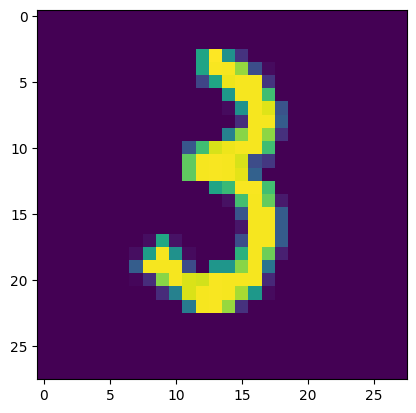

In [17]:
plt.imshow(x_train[1234])
print('Nhãn của mẫu dữ liệu thứ 1234: ', y_train[1234])
print('Kích thước của ảnh train: ', x_train[1234].shape)
print('Số điểm ảnh nếu biến đổi thành vector: ',
      x_train[1234].shape[0]*x_train[1234].shape[1])

Tiền xử lý dữ liệu trước khi huấn luyện mô hình:
- Chuyển output sang dạng one-hot vector
- Chuẩn hóa dữ liệu input về khoảng giá trị `[0-1]`

In [18]:
# Hàm chuyển đổi output từ dạng nhãn (label) sang vector one-hot
def onehot(y):
    oh = np.zeros((y.shape[0], y.max()+1))
    oh[np.arange(y.shape[0]), y] = 1
    return oh

y_train_oh = onehot(y_train)
y_test_oh = onehot(y_test)

# Chuẩn hóa dữ liệu input trên dữ liệu train và test
n_train_sample, h, w = x_train.shape
n_test_sample, _,_ = x_test.shape # Kích thước ngang x cao giống nhau trên tất cả mẫu

x_train = (x_train.astype('float32')) / 255.0
x_test = (x_test.astype('float32')) / 255.0
x_train_vec = x_train.reshape((n_train_sample, w*h))
x_test_vec = x_test.reshape((n_test_sample, w*h))

Khởi tạo mô hình từ đầu sao cho phù hợp với dữ liệu MNIST.
Trong đó, thông tin cấu hình về lớp ẩn:
- 2 lớp ẩn
- 100 neuron mỗi lớp ẩn
- huấn luyện với 30 epochs

In [19]:
nn4mnist = NeuralNetwork()

# Hoàn tất đoạn code sau đây với việc sử dụng biến `nn4mnist` để gọi
# phương thức `build`# và `train`. Lưu ý: sử dụng các tham số phù hợp
# theo yêu cầu đã nêu.

# YOUR CODE HERE
#raise NotImplementedError()
nn4mnist.build(784,10,2,100)

nn4mnist.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
hist = nn4mnist.train(x_train_vec,y_train_oh,epochs = 30)



Epoch 1/30
1875/1875 [==============================] - 11s 6ms/step - loss: 1.3057
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4495
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3460
Epoch 4/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3037
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2751
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2519
Epoch 7/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2323
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2153
Epoch 9/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2004
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1876
Epoch 11/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1762
Epoch 12/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1661


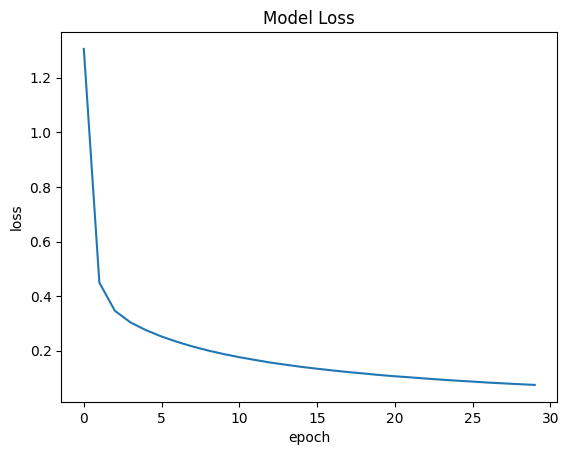

In [21]:
# Trực quan hóa giá trị loss trong quá trình huấn luyện
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [22]:
# Kiểm tra sơ bộ biến `hist`: nếu quá trình khởi tạo và huấn luyện thành công
# thì các bài test sau sẽ vượt qua được.
assert hist is not None
assert 'loss' in hist.history
assert len(hist.history['loss']) == 30

In [23]:
# Kiểm tra với bộ test
assert len(nn4mnist.model.layers)==4
assert str(type(nn4mnist.model.layers[0])).endswith("input_layer.InputLayer'>") == True
assert str(type(nn4mnist.model.layers[1])).endswith("core.dense.Dense'>") == True
assert str(type(nn4mnist.model.layers[2])).endswith("core.dense.Dense'>") == True
assert str(type(nn4mnist.model.layers[3])).endswith("core.dense.Dense'>") == True

# Check shapes
assert nn4mnist.model.layers[0].input_shape[0][1] == 784
assert nn4mnist.model.layers[1].output_shape[1] == 100
assert nn4mnist.model.layers[2].output_shape[1] == 100
assert nn4mnist.model.layers[3].output_shape[1] == 10

# Check activation
assert abs(nn4mnist.model.layers[1].activation(1.0).numpy() - 0.7310586)<0.00000001
assert abs(nn4mnist.model.layers[2].activation(-1.0).numpy() - 0.26894143)<0.00000001

inputs = tf.random.normal(shape=(32, 10))
assert np.mean(abs(nn4mnist.model.layers[3].activation(inputs).numpy() -
                   tf.keras.activations.softmax(inputs).numpy()))<0.00001

# Check bias
assert nn4mnist.model.layers[1].use_bias == True
assert nn4mnist.model.layers[2].use_bias == True
assert nn4mnist.model.layers[3].use_bias == True

Sau quá trình huấn luyện, chúng ta sử dụng mô hình để dự đoán trên mẫu dữ liệu test:

In [24]:
pred = nn4mnist.predict(x_test_vec)

313/313 [==============================] - 1s 2ms/step


Cuối cùng, trực quan hóa một mẫu dữ liệu test bất kỳ (ví dụ mẫu thứ 50):

Label of the data:  6
Predicted label of the data:  6


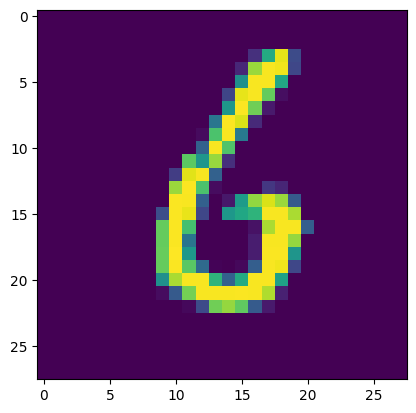

In [25]:
# Show the 50-th test sample
test_id = 50
plt.imshow(x_test[test_id])
print('Label of the data: ', y_test[test_id])
print('Predicted label of the data: ', np.argmax(pred[test_id]))